In [1]:
%matplotlib inline
import statistics as std
import pandas as pd                                 
import numpy as np                          #Importando os módulos necessários
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.time import Time
from astropy.io.fits import HDUList

In [2]:
it = ['2019-01-10T21:00:00']                             #Inicio das observaçoes
itime = Time(it, format = 'isot', scale = 'utc' )

In [3]:
file = open('logfile','r')                       #Abrindo o arquivo com os dados
fwhm_1998NU = []                                 #Lista vazia para salvar os valores do fwhm
fwhm_2000NG11 = []                               #Lista vazia para salvar os valores do fwhm
fwhm_2009SV17_120s = []                          #Lista vazia para salvar os valores do fwhm
fwhm_2009SV17_200s = []                          #Lista vazia para salvar os valores do fwhm
fwhm_GD108 = []                                  #Lista vazia para salvar os valores do fwhm

for indice, linha in enumerate(file):            #Loop para ler as linhas apartir da 480 e pegar o fwhm
    if indice >=1 and indice < 104:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_1998NU.append(float(linha[47:]))
    elif indice >=104 and indice < 129:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_2000NG11.append(float(linha[47:]))
    elif indice >=129 and indice < 144:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_2009SV17_120s.append(float(linha[47:]))
    elif indice >=147 and indice <= 170:
        if linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_2009SV17_200s.append(float(linha[39:]))
    elif indice >171:
        if linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_GD108.append(float(linha[39:]))
        elif linha[:47]== '  Average full width at half maximum (FWHM) of ':
            fwhm_GD108.append(float(linha[47:]))
            
fwhm_1998NU = sorted(fwhm_1998NU)
fwhm_2000NG11 = sorted(fwhm_2000NG11)
fwhm_2009SV17_120s = sorted(fwhm_2009SV17_120s)
fwhm_2009SV17_200s = sorted(fwhm_2009SV17_200s)
fwhm_GD108 = sorted(fwhm_GD108)

<h1>1998NU</h1>

In [4]:
#imagens usadas no psfmeasure = 1,51,101,151,201,251,301,331

name_1998NU = '1998NU/1998NU_40s_b2x2-001_R.fit'
imagens_1998NU = []                                                        #Lista com o nome das imagens

for i in range(0,331,50):       
    if i < 10:                                                      #Para imagens 001 ate 009 
        number_1998NU = name_1998NU[23:26].replace(name_1998NU[25],str(int(name_1998NU[25])+i))   
        imagens_1998NU.append('1998NU/1998NU_40s_b2x2-' + str(number_1998NU) + '_R.fit' )
    elif i >= 10 and i < 100:                                       #Para imagens 010 ate 099 
        name_1998NU = '1998NU/1998NU_40s_b2x2-011_R.fit'
        number_1998NU = name_1998NU[23:25].replace(name_1998NU[25],str(int(name_1998NU[25])+i))
        imagens_1998NU.append('1998NU/1998NU_40s_b2x2-' + str(number_1998NU) + '_R.fit' )
for i in range(1,331,50):                                           #Para imagens >100 
    if i >= 100 and i < 331:
        name_1998NU = '1998NU/1998NU_40s_b2x2-100_R.fit'
        number_1998NU = name_1998NU[25:26].replace(name_1998NU[25],str(int(name_1998NU[25])+i))
        imagens_1998NU.append('1998NU/1998NU_40s_b2x2-' + str(number_1998NU) + '_R.fit' )
        
imagens_1998NU.append('1998NU/1998NU_40s_b2x2-331_R.fit')

In [5]:
datas_1998NU = []                                                #Lista com as datas

for i in imagens_1998NU:                                        #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                           #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                 #Extraindo o header de cada imagem
            datas_1998NU.append(hdul[0].header['DATE-OBS'])
            
tempos_1998NU = Time(datas_1998NU, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_1998NU = []                                                   #Inicializando a lista com os pontos
t_1998NU = np.empty(len(tempos_1998NU))                                 #Inicializando array para plotar

for i in range(len(tempos_1998NU)):
    dt_1998NU.append(tempos_1998NU[i] - itime)
    t_1998NU[i] = (dt_1998NU[i].value)*24                               #Calculando os valores de dt em HORAS
    
t_1998NU = sorted(t_1998NU)

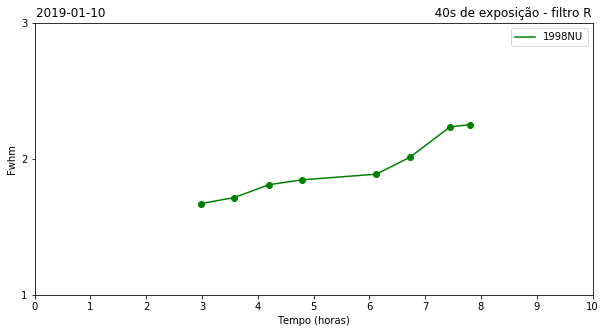

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(t_1998NU, fwhm_1998NU, color = 'green')
plt.plot(t_1998NU, fwhm_1998NU, color = 'green', label='1998NU')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-10' + ' '*85 + '40s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>2000NG11</h1>

In [7]:
#imagens usadas no psfmeasure = 2,3,4

name_2000NG11 = '2000NG11/2000NG11_240s_b2x2-002_R.fit'
imagens_2000NG11 = []                                                        #Lista com o nome das imagens

for i in range(0,3,1):       
    number_2000NG11 = name_2000NG11[28:31].replace(name_2000NG11[30],str(int(name_2000NG11[30])+i))   
    imagens_2000NG11.append('2000NG11/2000NG11_240s_b2x2-' + str(number_2000NG11) + '_R.fit' )
        

In [8]:
datas_2000NG11 = []                                                #Lista com as datas

for i in imagens_2000NG11:                                        #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                           #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                 #Extraindo o header de cada imagem
            datas_2000NG11.append(hdul[0].header['DATE-OBS'])
            
tempos_2000NG11 = Time(datas_2000NG11, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_2000NG11 = []                                                   #Inicializando a lista com os pontos
t_2000NG11 = np.empty(len(tempos_2000NG11))                                 #Inicializando array para plotar

for i in range(len(tempos_2000NG11)):
    dt_2000NG11.append(tempos_2000NG11[i] - itime)
    t_2000NG11[i] = (dt_2000NG11[i].value)*24                               #Calculando os valores de dt em HORAS
    
t_2000NG11 = sorted(t_2000NG11)

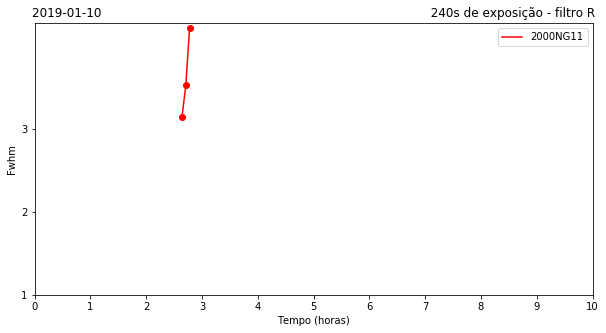

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(t_2000NG11, fwhm_2000NG11, color = 'red')
plt.plot(t_2000NG11, fwhm_2000NG11, color = 'red', label  ='2000NG11')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-10' + ' '*85 + '240s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>2009SV17_120s</h1>

In [10]:
#imagens usadas no psfmeasure = 1,2

name_2009SV17_120s = '2009SV17_120s/2009SV17_120s_b2x2-001_R.fit'
imagens_2009SV17_120s = []                                                        #Lista com o nome das imagens

for i in range(0,2,1):       
    number_2009SV17_120s = name_2009SV17_120s[33:36].replace(name_2009SV17_120s[35],str(int(name_2009SV17_120s[35])+i))   
    imagens_2009SV17_120s.append('2009SV17_120s/2009SV17_120s_b2x2-' + str(number_2009SV17_120s) + '_R.fit' )
        

In [11]:
datas_2009SV17_120s = []                                                #Lista com as datas

for i in imagens_2009SV17_120s:                                                       #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                                        #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                                              #Extraindo o header de cada imagem
            datas_2009SV17_120s.append(hdul[0].header['DATE-OBS'])
            
tempos_2009SV17_120s = Time(datas_2009SV17_120s, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_2009SV17_120s = []                                                                 #Inicializando a lista com os pontos
t_2009SV17_120s = np.empty(len(tempos_2009SV17_120s))                                 #Inicializando array para plotar

for i in range(len(tempos_2009SV17_120s)):
    dt_2009SV17_120s.append(tempos_2009SV17_120s[i] - itime)
    t_2009SV17_120s[i] = (dt_2009SV17_120s[i].value)*24                               #Calculando os valores de dt em HORAS

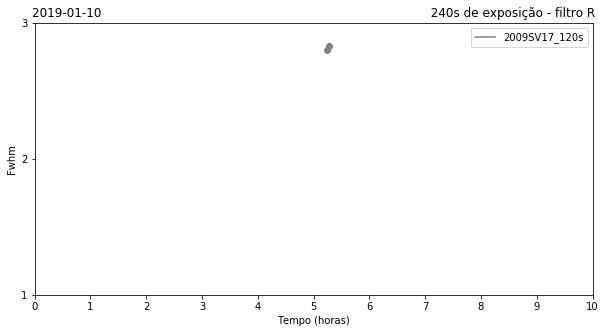

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(t_2009SV17_120s, fwhm_2009SV17_120s, color = 'grey')
plt.plot(t_2009SV17_120s, fwhm_2009SV17_120s, color = 'grey', label  ='2009SV17_120s')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-10' + ' '*85 + '240s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>2009SV17_200s</h1>

In [13]:
#imagens usadas no psfmeasure = 1,2,3,4

name_2009SV17_200s = '2009SV17_200s/2009SV17_200s_b2x2-001_R.fit'
imagens_2009SV17_200s = []                                                        #Lista com o nome das imagens

for i in range(0,4,1):       
    number_2009SV17_200s = name_2009SV17_200s[33:36].replace(name_2009SV17_200s[35],str(int(name_2009SV17_200s[35])+i))   
    imagens_2009SV17_200s.append('2009SV17_200s/2009SV17_200s_b2x2-' + str(number_2009SV17_200s) + '_R.fit' )
        

In [14]:
datas_2009SV17_200s = []                                                #Lista com as datas

for i in imagens_2009SV17_200s:                                                       #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                                        #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                                              #Extraindo o header de cada imagem
            datas_2009SV17_200s.append(hdul[0].header['DATE-OBS'])
            
tempos_2009SV17_200s = Time(datas_2009SV17_200s, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_2009SV17_200s = []                                                                 #Inicializando a lista com os pontos
t_2009SV17_200s = np.empty(len(tempos_2009SV17_200s))                                 #Inicializando array para plotar

for i in range(len(tempos_2009SV17_200s)):
    dt_2009SV17_200s.append(tempos_2009SV17_200s[i] - itime)
    t_2009SV17_200s[i] = (dt_2009SV17_200s[i].value)*24                               #Calculando os valores de dt em HORAS

t_2009SV17_200s = sorted(t_2009SV17_200s)

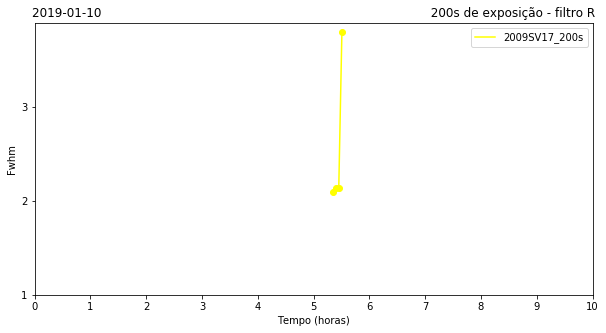

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(t_2009SV17_200s, fwhm_2009SV17_200s, color = 'yellow')
plt.plot(t_2009SV17_200s, fwhm_2009SV17_200s, color = 'yellow', label  ='2009SV17_200s')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-10' + ' '*85 + '200s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>GD108</h1>

In [16]:
#imagens usadas no psfmeasure = 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15

name_GD108 = 'GD108/GD108_10s_b2x2-001_R.fit'
imagens_GD108 = []                                                        #Lista com o nome das imagens

for i in range(0,15,1):
    if i < 9:                                                      #Para imagens 001 ate 009 
        number_GD108 = name_GD108[22:24].replace(name_GD108[23],str(int(name_GD108[23])+i))   
        imagens_GD108.append('GD108/GD108_10s_b2x2-0' + str(number_GD108) + '_R.fit' )

for i in range(1,16,1):
    if i >= 10:                                       #Para imagens 010 até 015
        name_GD108 = 'GD108/GD108_10s_b2x2-010_R.fit'
        number_GD108 = name_GD108[23:24].replace(name_GD108[23],str(int(name_GD108[23])+i))
        imagens_GD108.append('GD108/GD108_10s_b2x2-0' + str(number_GD108) + '_R.fit' )

In [17]:
datas_GD108 = []                                                #Lista com as datas

for i in imagens_GD108:                                                       #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                                        #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                                              #Extraindo o header de cada imagem
            datas_GD108.append(hdul[0].header['DATE-OBS'])
            
tempos_GD108 = Time(datas_GD108, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_GD108 = []                                                                 #Inicializando a lista com os pontos
t_GD108 = np.empty(len(tempos_GD108))                                 #Inicializando array para plotar

for i in range(len(tempos_GD108)):
    dt_GD108.append(tempos_GD108[i] - itime)
    t_GD108[i] = (dt_GD108[i].value)*24                               #Calculando os valores de dt em HORAS

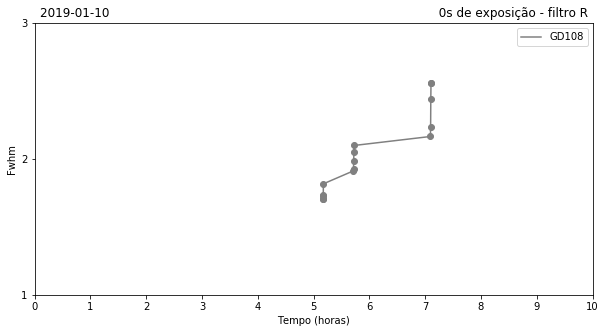

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(t_GD108, fwhm_GD108, color = 'grey')
plt.plot(t_GD108, fwhm_GD108, color = 'grey', label  ='GD108')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-10' + ' '*85 + '0s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

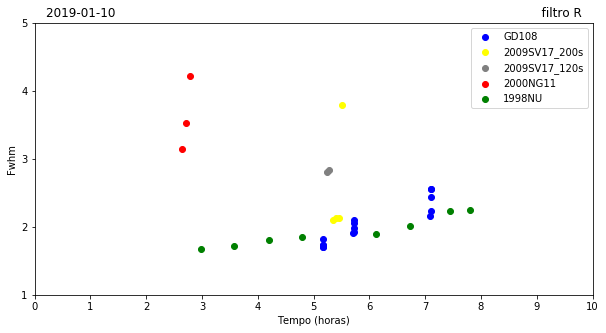

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(t_GD108, fwhm_GD108, color = 'blue', label = 'GD108')
plt.scatter(t_2009SV17_200s, fwhm_2009SV17_200s, color = 'yellow', label = '2009SV17_200s')
plt.scatter(t_2009SV17_120s, fwhm_2009SV17_120s, color = 'grey', label = '2009SV17_120s')
plt.scatter(t_2000NG11, fwhm_2000NG11, color = 'red', label = '2000NG11')
plt.scatter(t_1998NU, sorted(fwhm_1998NU), color = 'green', label = '1998NU')
plt.yticks(np.arange(1, 6, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-10' + ' '*110 + 'filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.savefig('2019-01-10_scatterfwhmxtime.png')
plt.legend()
plt.show()

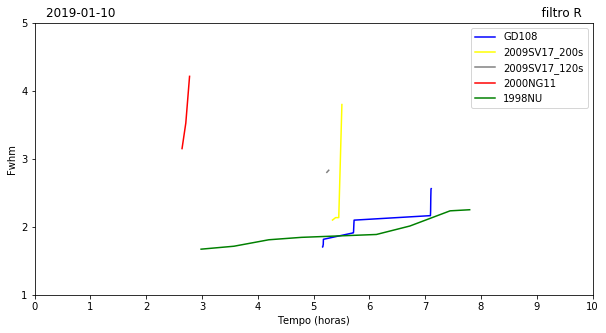

In [20]:
plt.figure(figsize=(10,5))
plt.plot(t_GD108, fwhm_GD108, color = 'blue', label = 'GD108')
plt.plot(t_2009SV17_200s, fwhm_2009SV17_200s, color = 'yellow', label = '2009SV17_200s')
plt.plot(t_2009SV17_120s, fwhm_2009SV17_120s, color = 'grey', label = '2009SV17_120s')
plt.plot(t_2000NG11, fwhm_2000NG11, color = 'red', label = '2000NG11')
plt.plot(t_1998NU, fwhm_1998NU, color = 'green', label = '1998NU')
plt.yticks(np.arange(1, 6, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-10' + ' '*110 + 'filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.savefig('2019-01-10_scatterfwhmxtime.png')
plt.legend()
plt.show()

In [21]:
fwhm = fwhm_1998NU + fwhm_2000NG11 + fwhm_2009SV17_120s + fwhm_2009SV17_200s+ fwhm_GD108
mean_fwhm = std.mean(fwhm)
median_fwhm = std.median(fwhm)

print(mean_fwhm)
print(median_fwhm)

2.27355625
2.09945
